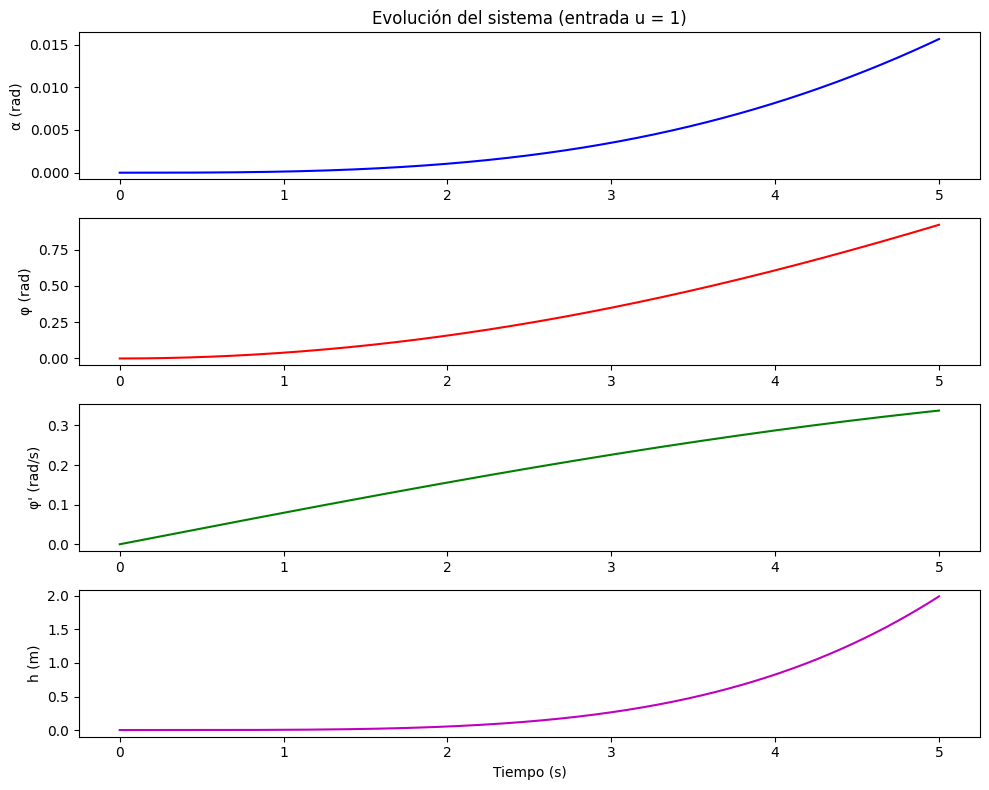

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
omega = 0.2
a = 0.01
b = 2
c = 100
dt = 1e-3         # Paso de integración
T = 5             # Tiempo total
N = int(T / dt)   # Número de pasos

# Matrices A y B
A = np.array([
    [-a,      a,      0,   0],
    [ 0,      0,      1,   0],
    [omega**2, -omega**2, 0,   0],
    [c,       0,      0,   0]
])

B = np.array([
    [0],
    [0],
    [omega**2 * b],
    [0]
])

# Inicialización
x = np.zeros((4, N+1))  # Estados: [alpha, phi, dphi, h]
u = 1                   # Entrada constante
t = np.linspace(0, T, N+1)

# Simulación con método de Euler
for k in range(N):
    x[:, k+1] = x[:, k] + dt * (A @ x[:, k] + B.flatten() * u)

# Graficar resultados
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(t, x[0], label='α (rad)', color='b')
plt.ylabel('α (rad)')
plt.title('Evolución del sistema (entrada u = 1)')

plt.subplot(4, 1, 2)
plt.plot(t, x[1], label='φ (rad)', color='r')
plt.ylabel('φ (rad)')

plt.subplot(4, 1, 3)
plt.plot(t, x[2], label='dφ/dt (rad/s)', color='g')
plt.ylabel("φ' (rad/s)")

plt.subplot(4, 1, 4)
plt.plot(t, x[3], label='h (m)', color='m')
plt.ylabel('h (m)')
plt.xlabel('Tiempo (s)')

plt.tight_layout()
plt.show()
